# Imports and Setup


In [ ]:
# Libraries needed 
! pip3 install torchnet -q
! pip3 install wandb -q

In [ ]:
# Imports
import numpy as np
from tqdm import tqdm
import pandas as pd
import wandb

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading from wandb
api = wandb.Api()

# Unbalanced Classes: different number of labeled and unlabed classes

In [ ]:
# Collect runs
runs_loss = api.runs("mhaggag96/trends_project",{"tags": "autonovel_c"})
run_5_5 = api.run("mhaggag96/trends_project/23ihb9aa")
run_9_1 = api.run("jacopodona/autonovel/lj6goyaa")

run_names=['auto_7_3','auto_1_9','auto_3_7', 'auto_5_5', 'auto_9_1']
data_df = []
for run in runs_loss:
  data_df.append(run.history())

runs_loss = [run_5_5, run_9_1]
for run in runs_loss:
  data_df.append(run.history())
test_dict = dict(zip(run_names, data_df)) 


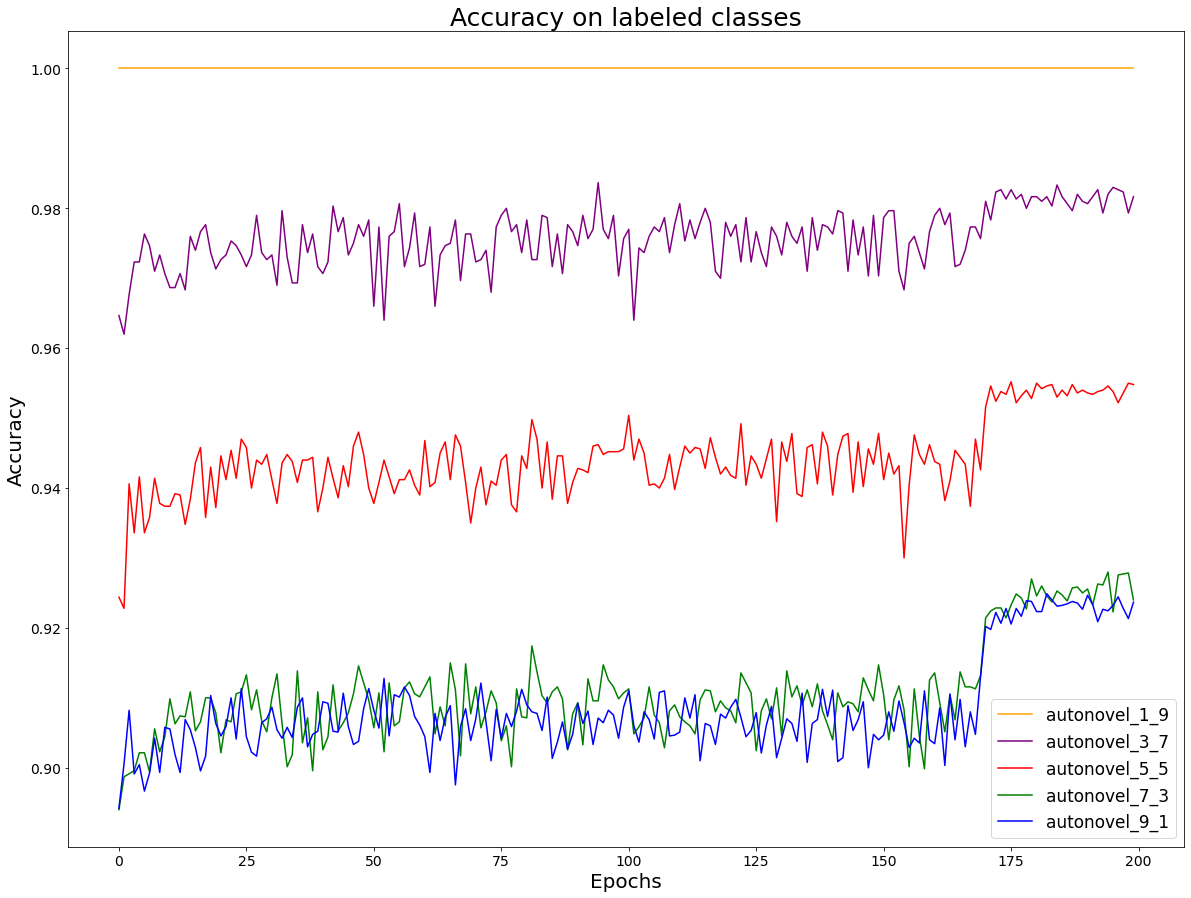

In [ ]:
# Plot Lab Accuracy
fig, ax= plt.subplots(figsize=(20, 15));
ax.plot(test_dict['auto_1_9'].cluster_acc_Head_1.tolist(), color='orange',label="autonovel_1_9") ;
ax.plot(test_dict['auto_3_7'].cluster_acc_Head_1.tolist(), color='purple',label="autonovel_3_7") ;
ax.plot(test_dict['auto_5_5'].cluster_acc_Head_1.tolist(), color='red',label="autonovel_5_5") ;
ax.plot(test_dict['auto_7_3'].cluster_acc_Head_1.tolist(), color='green',label="autonovel_7_3") ;
ax.plot(test_dict['auto_9_1'].cluster_acc_Head_1.tolist(), color='blue',label="autonovel_9_1") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Accuracy',fontsize=20);
ax.set_title('Accuracy on labeled classes',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

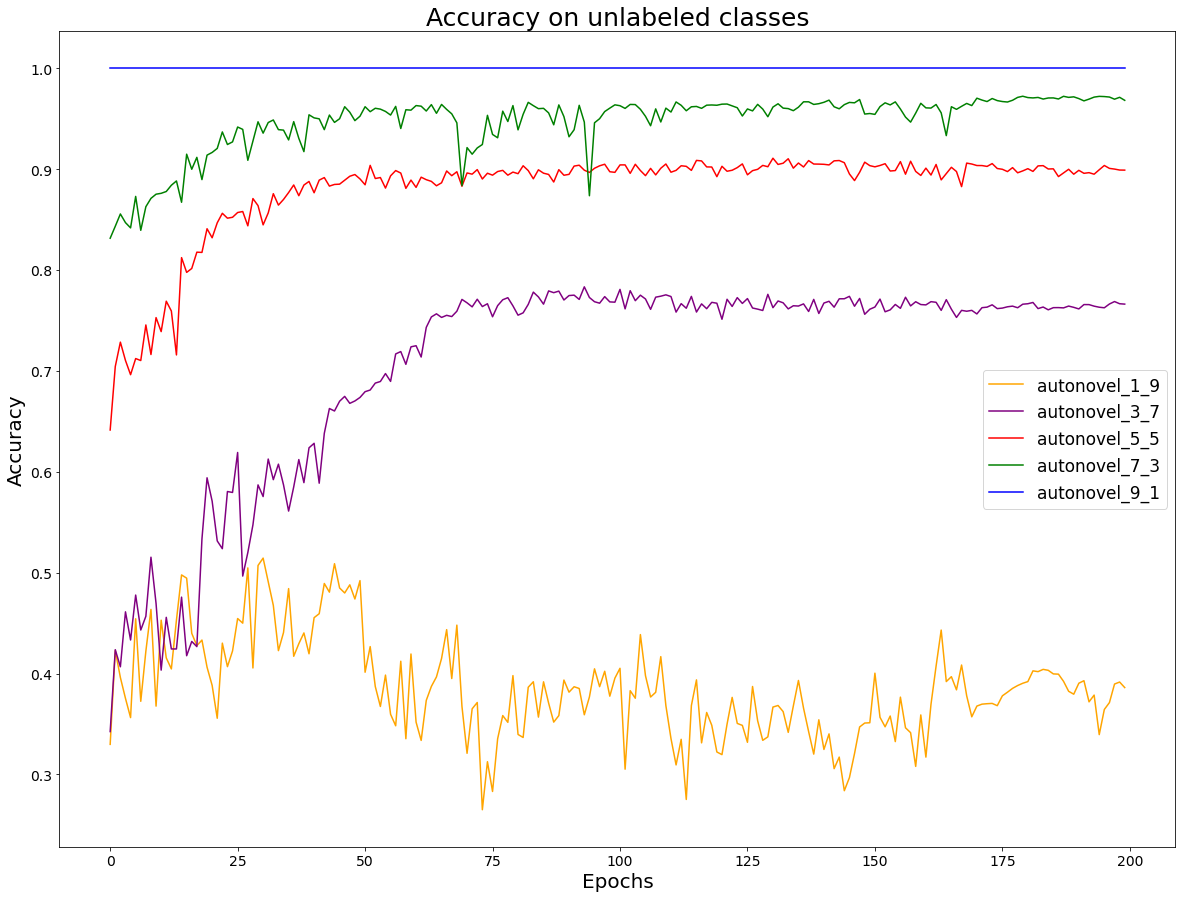

In [ ]:
# Plot Unlab Accuracy
fig, ax= plt.subplots(figsize=(20, 15));
ax.plot(test_dict['auto_1_9'].cluster_acc_Head_2.tolist(), color='orange',label="autonovel_1_9") ;
ax.plot(test_dict['auto_3_7'].cluster_acc_Head_2.tolist(), color='purple',label="autonovel_3_7") ;
ax.plot(test_dict['auto_5_5'].cluster_acc_Head_2.tolist(), color='red',label="autonovel_5_5") ;
ax.plot(test_dict['auto_7_3'].cluster_acc_Head_2.tolist(), color='green',label="autonovel_7_3") ;
ax.plot(test_dict['auto_9_1'].cluster_acc_Head_2.tolist(), color='blue',label="autonovel_9_1") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Accuracy',fontsize=20);
ax.set_title('Accuracy on unlabeled classes',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

In [ ]:
cluster_acc_unlab = []
run_names.sort()
for i in run_names:
  acc = test_dict[i].cluster_acc_Head_2.tolist()
  cluster_acc_unlab.append(acc[199])
  
cluster_acc_lab = []
run_names.sort()
for i in run_names:
  acc = test_dict[i].cluster_acc_Head_1.tolist()
  cluster_acc_lab.append(acc[199])

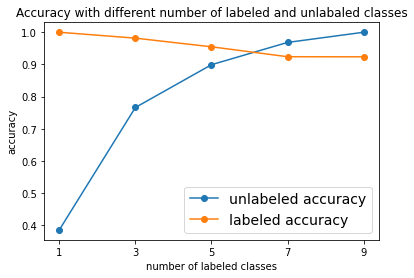

In [ ]:
# Plot Final Accuracy
x = [1,3,5,7,9]

plt.plot(x, cluster_acc_unlab, label = "unlabeled accuracy", marker='o')
plt.plot(x, cluster_acc_lab, label = "labeled accuracy", marker='o')

# naming the x axis
x_labels = ['1', '3', '5', '7', '9']

plt.xticks(ticks=x, labels=x_labels)
plt.xlabel('number of labeled classes')

# naming the y axis
plt.ylabel('accuracy')
  

plt.title('Accuracy with different number of labeled and unlabaled classes')
plt.legend(loc='best', framealpha=0.8,fontsize=14)
plt.show()